In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

#1. Загрузка данных
df = pd.read_csv('coffee_shop_revenue.csv')

#2. Информация о данных
print(df.head())
print(df.info())
print(df.describe())

#3. Обработка данных
#Проверяем наличие пропущенных значений
print('Наличие пропущенных значений:')
print(df.isnull().sum())

#Проверяем наличие дубликатов
print('\nНаличие дубликатов:', df.duplicated().sum())


   Number_of_Customers_Per_Day  Average_Order_Value  Operating_Hours_Per_Day  \
0                          152                 6.74                       14   
1                          485                 4.50                       12   
2                          398                 9.09                        6   
3                          320                 8.48                       17   
4                          156                 7.44                       17   

   Number_of_Employees  Marketing_Spend_Per_Day  Location_Foot_Traffic  \
0                    4                   106.62                     97   
1                    8                    57.83                    744   
2                    6                    91.76                    636   
3                    4                   462.63                    770   
4                    2                   412.52                    232   

   Daily_Revenue  
0        1547.81  
1        2084.68  
2        3118.39 

Метрики качества:
MAE: 178.8542
MSE: 48939.4837
RMSE: 221.2227
R²: 0.9455


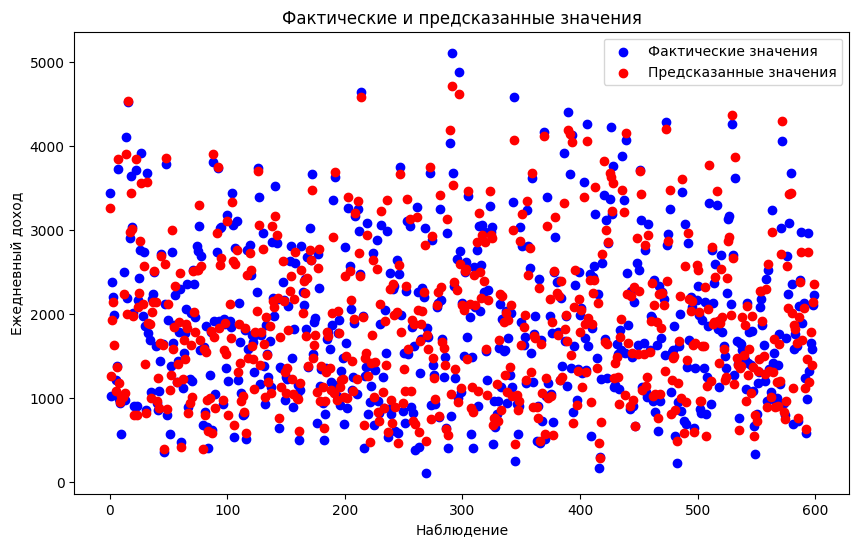

In [3]:
#1. Регрессор Gradient Boosting.
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = df.drop(['Daily_Revenue'], axis=1)
y = df['Daily_Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели Gradient Boosting Regressor
model = GradientBoostingRegressor() # параметры
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Метрики качества:')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Ежедневный доход')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

Метрики качества:
MAE: 179.8818
MSE: 49058.1881
RMSE: 221.4908
R²: 0.9475


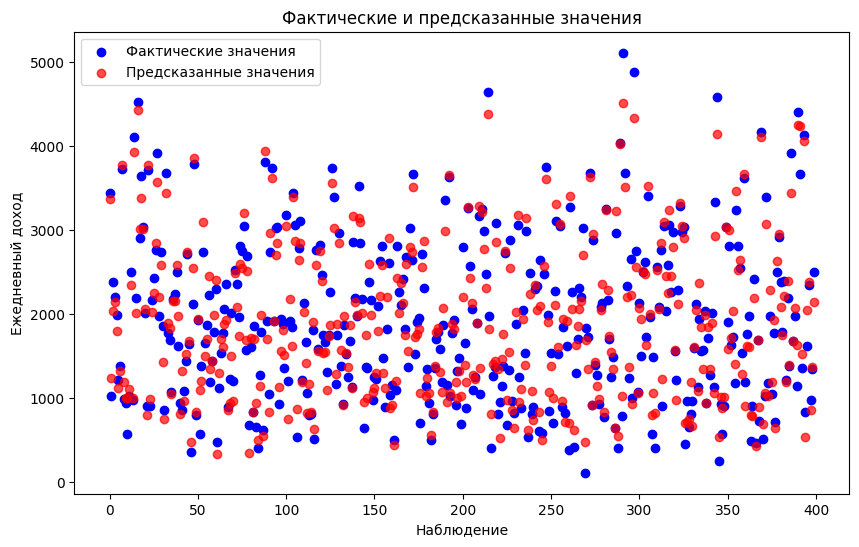

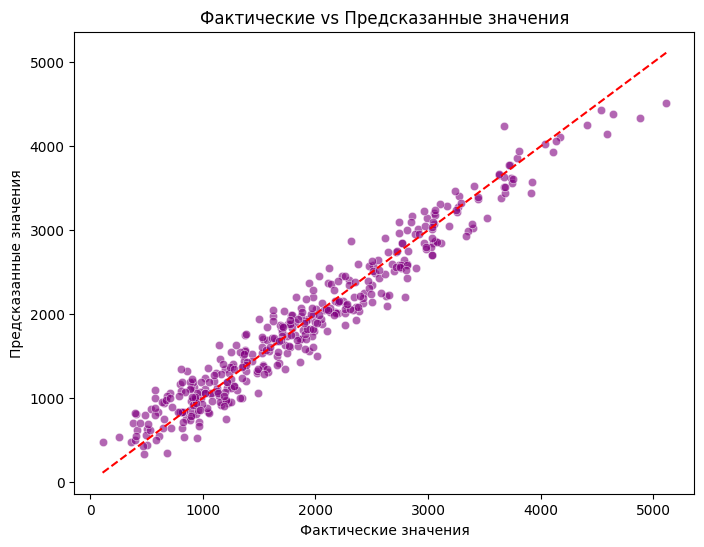

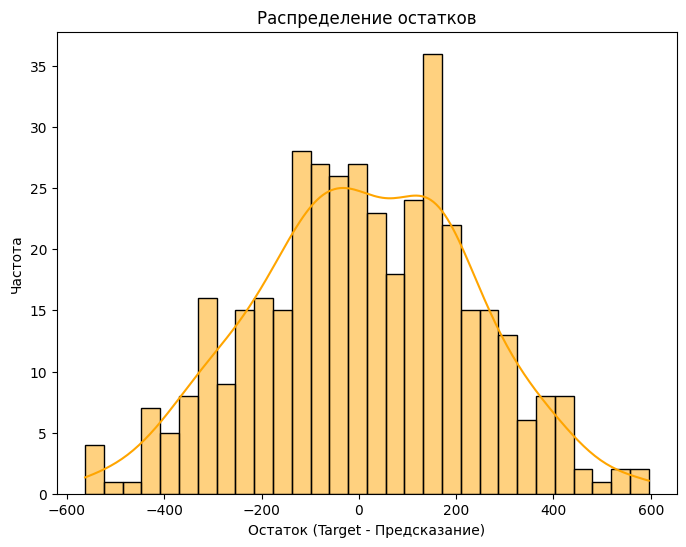

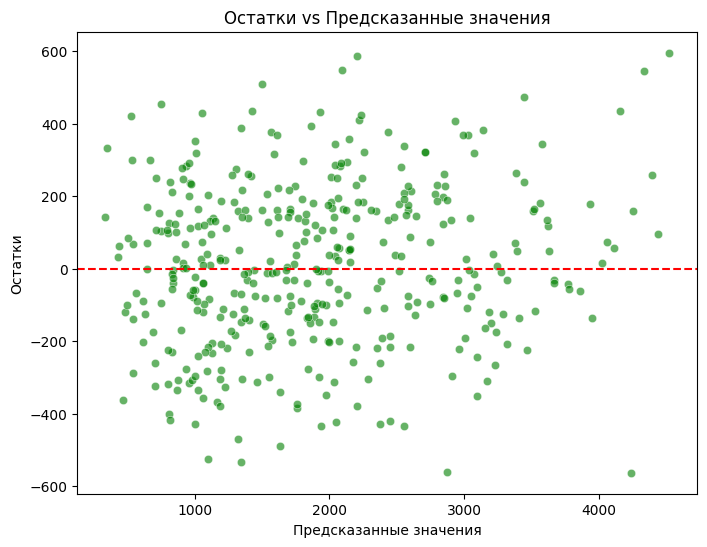

/tmp/ipython-input-3227575978.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette='viridis')


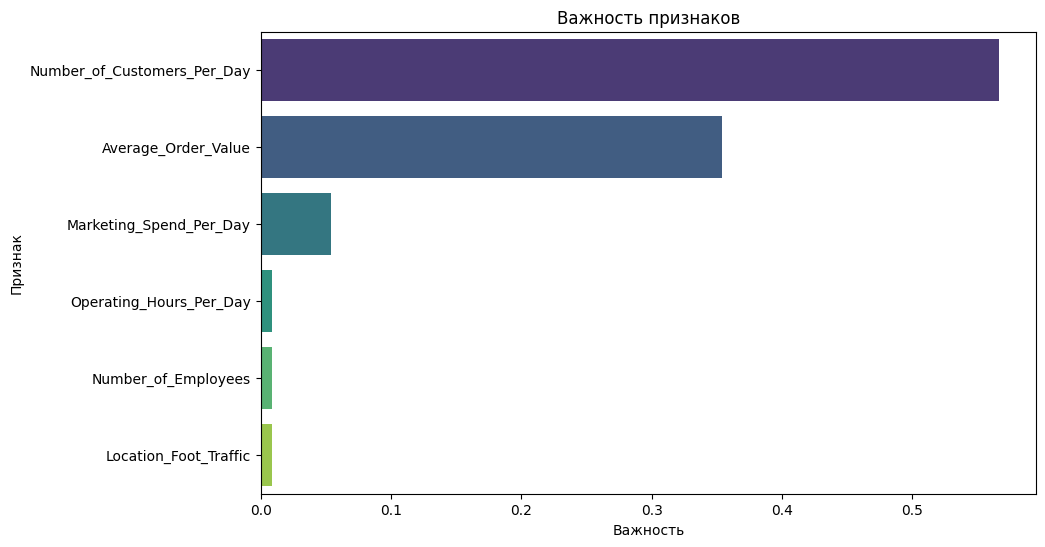

In [4]:
#2. ExtraTreesRegressor
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Создание и обучение модели Extra Trees Regressor
etr = ExtraTreesRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
etr.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = etr.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Метрики качества:')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения', alpha=0.7)
plt.xlabel('Наблюдение')
plt.ylabel('Ежедневный доход')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

# Диаграмма предсказанных vs фактических значений
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs Предсказанные значения')
plt.show()

# График остатков
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title('Распределение остатков')
plt.xlabel('Остаток (Target - Предсказание)')
plt.ylabel('Частота')
plt.show()

# Остатки vs Предсказанные значения
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказанные значения')
plt.show()

# Важность признаков
importances = etr.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns.tolist()
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette='viridis')
plt.title('Важность признаков')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

Метрики качества:
MAE: 169.3120
MSE: 44454.5416
RMSE: 210.8425
R²: 0.9524


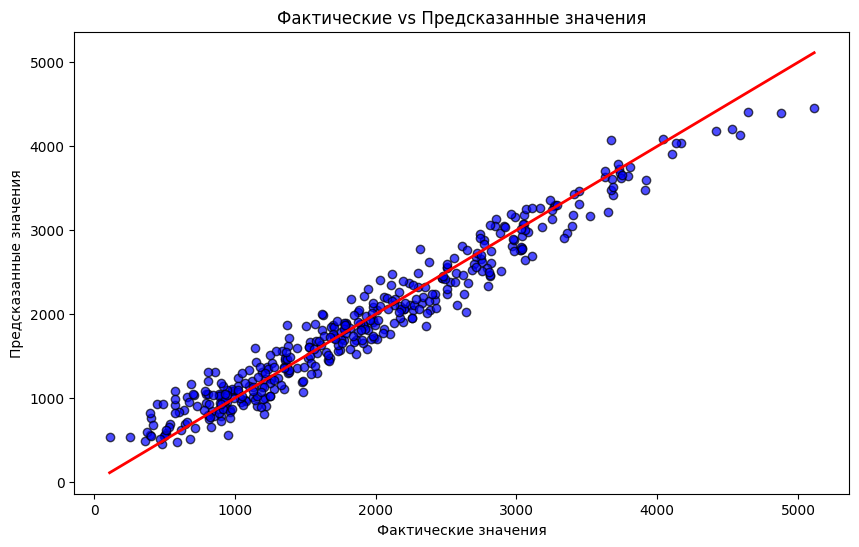

In [7]:
#3. Регрессор CatBoost.
!pip install catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Разделение данных на признаки и целевую переменную
X = df.drop(['Daily_Revenue'], axis=1)
y = df['Daily_Revenue']

# Создание и обучение модели CatBoost для регрессии
regressor = CatBoostRegressor(iterations=100, learning_rate=0.05, depth=6, random_state=42, verbose=0)
regressor.fit(X_train, y_train)

# Выполнение предсказаний на тестовых данных
y_pred = regressor.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Метрики качества:')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные значения")
plt.show()

Метрики качества:
MAE: 244.2052
MSE: 97567.8340
RMSE: 312.3585
R²: 0.8956


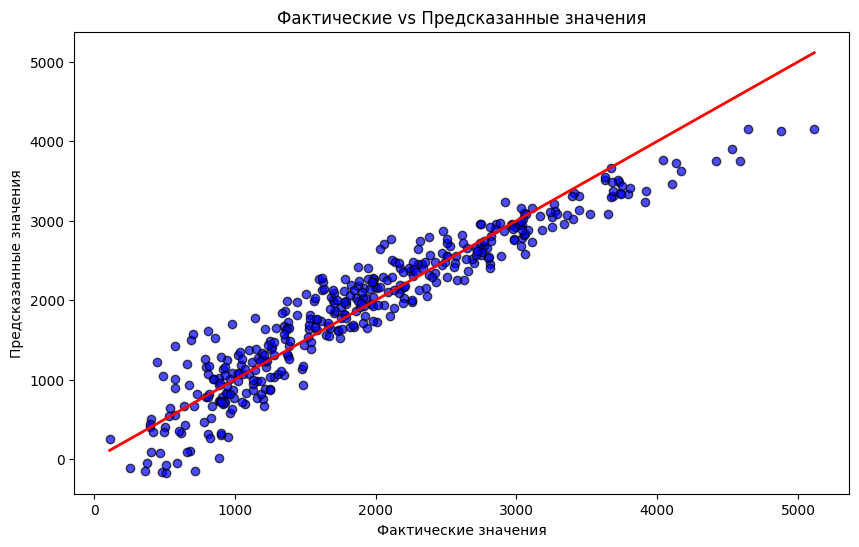

In [10]:
#4. Регрессия Лассо.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели регрессии Lasso
regressor = Lasso(alpha=0.1)
regressor.fit(X_train, y_train)

# Выполнение предсказаний на тестовых данных
y_pred = regressor.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Метрики качества:')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные значения")
plt.show()

K-ближайшие соседи - Средняя абсолютная ошибка (MAE): 505.78
K-ближайшие соседи - Среднеквадратичная ошибка (MSE): 414689.09
K-ближайшие соседи - Коэффициент детерминации (R²): 0.56


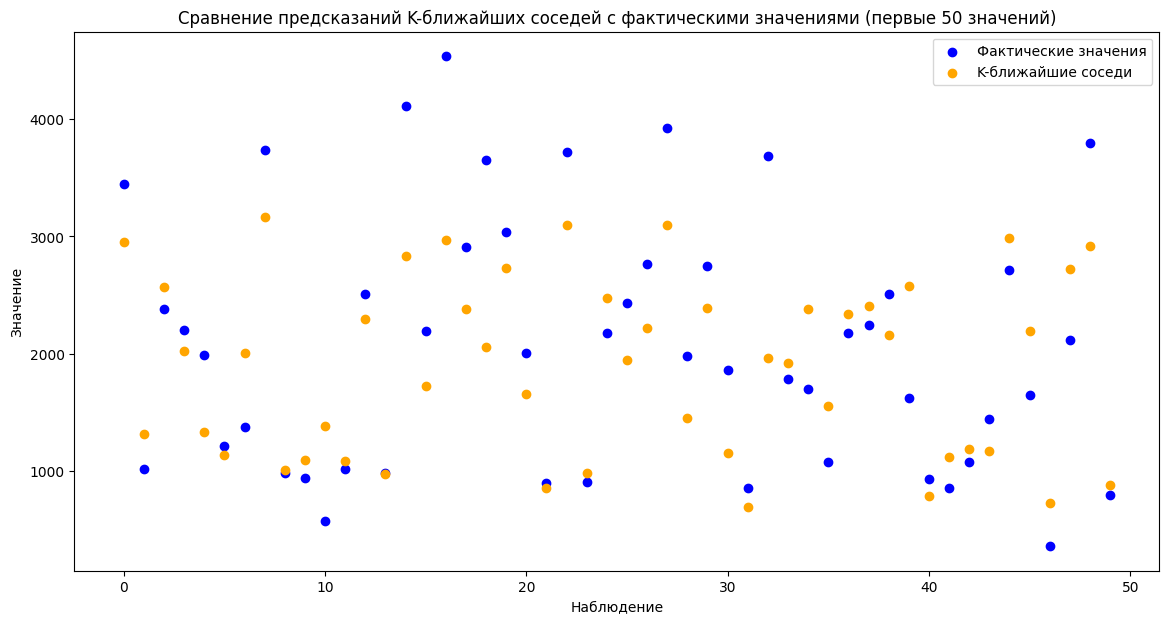

In [11]:
# 5. KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель K-ближайших соседей
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Обучаем модель K-ближайших соседей
knn_regressor.fit(X_train, y_train)

# Делаем прогнозы на тестовом наборе
y_pred_knn = knn_regressor.predict(X_test)

# Вычисление метрик для K-ближайших соседей
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"K-ближайшие соседи - Средняя абсолютная ошибка (MAE): {mae_knn:.2f}")
print(f"K-ближайшие соседи - Среднеквадратичная ошибка (MSE): {mse_knn:.2f}")
print(f"K-ближайшие соседи - Коэффициент детерминации (R²): {r2_knn:.2f}")

# Визуализация предсказаний K-ближайших соседей и фактических значений (первые 50 значений)
plt.figure(figsize=(14, 7))

plt.scatter(range(50), y_test[:50], label='Фактические значения', color='blue')
plt.scatter(range(50), y_pred_knn[:50], label='K-ближайшие соседи', color='orange')

plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Сравнение предсказаний K-ближайших соседей с фактическими значениями (первые 50 значений)')
plt.legend()
plt.show()

ElasticNet - Средняя абсолютная ошибка (MAE): 243.82
ElasticNet - Среднеквадратичная ошибка (MSE): 97362.87
ElasticNet - Коэффициент детерминации (R²): 0.90


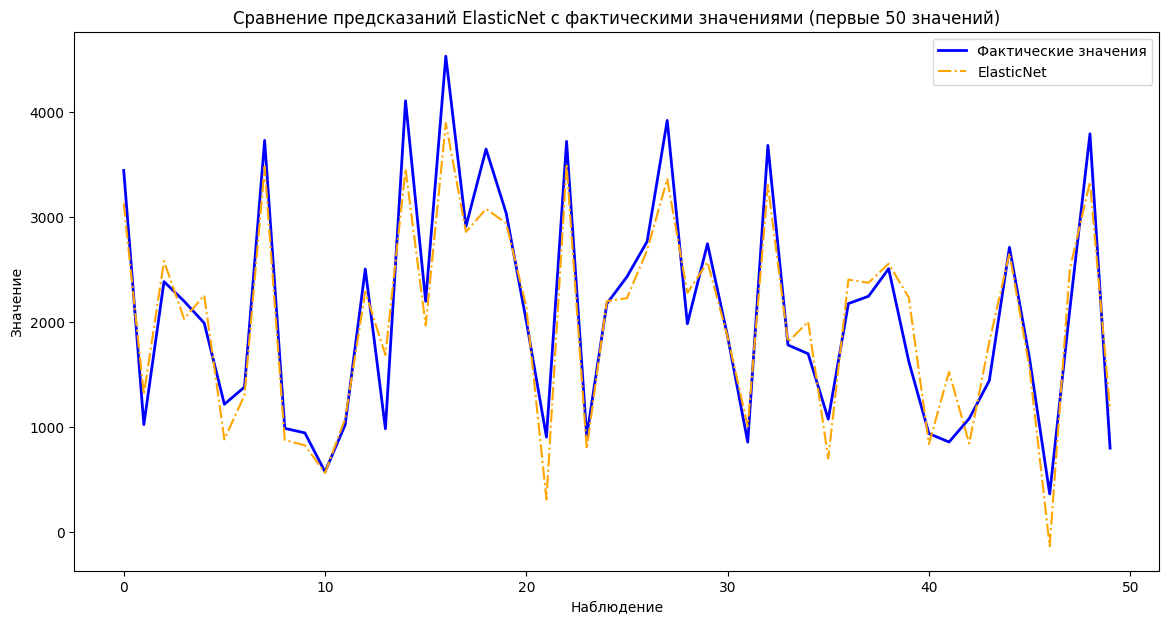

In [12]:
# 6. ElasticNet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Обучаем модель ElasticNet
elastic_net.fit(X_train, y_train)

# Делаем прогнозы на тестовом наборе
y_pred_en = elastic_net.predict(X_test)

# Вычисление метрик для ElasticNet
mae_en = mean_absolute_error(y_test, y_pred_en)
mse_en = mean_squared_error(y_test, y_pred_en)
r2_en = r2_score(y_test, y_pred_en)

print(f"ElasticNet - Средняя абсолютная ошибка (MAE): {mae_en:.2f}")
print(f"ElasticNet - Среднеквадратичная ошибка (MSE): {mse_en:.2f}")
print(f"ElasticNet - Коэффициент детерминации (R²): {r2_en:.2f}")

# Визуализируем предсказания ElasticNet и фактические значения (первые 50 значений)
plt.figure(figsize=(14, 7))
plt.plot(range(50), y_test.iloc[:50], label='Фактические значения', color='blue', linewidth=2)
plt.plot(range(50), y_pred_en[:50], label='ElasticNet', color='orange', linestyle='-.')

plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Сравнение предсказаний ElasticNet с фактическими значениями (первые 50 значений)')
plt.legend()
plt.show()

Средняя абсолютная ошибка (MAE): 175.39
Среднеквадратичная ошибка (MSE): 47501.55
Коэффициент детерминации (R²): 0.95


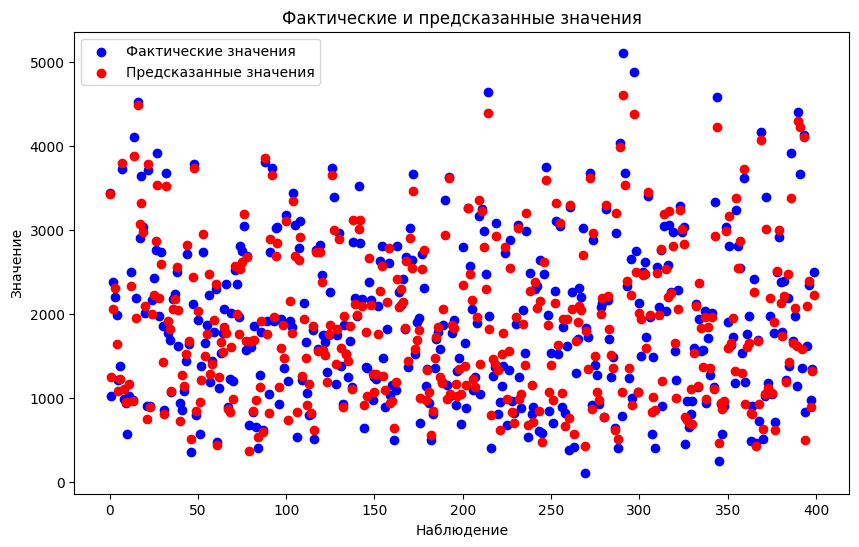

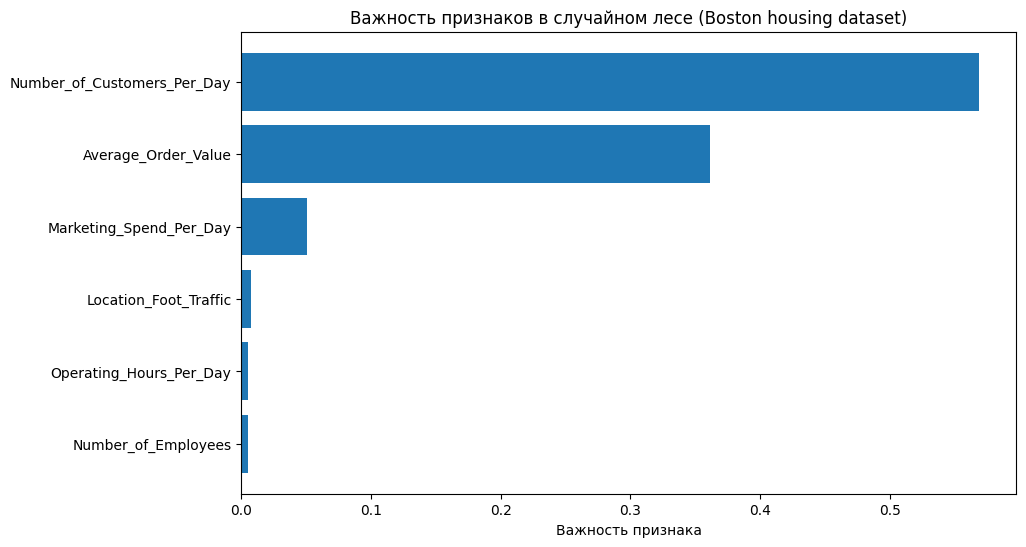

In [13]:
# 7. RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Создаем модель случайного леса
n_estimators = 100  # Количество деревьев в ансамбле
random_forest = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

# Обучаем модель случайного леса
random_forest.fit(X_train, y_train)

# Делаем прогнозы на тестовом наборе
y_pred = random_forest.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.2f}")

# Визуализируем предсказанные и фактические значения
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

# Визуализируем важность признаков
feature_importances = random_forest.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Важность признака')
plt.title('Важность признаков в случайном лесе (Boston housing dataset)')
plt.show()


Фиктивный регрессор - Средняя абсолютная ошибка (MAE): 790.73
Фиктивный регрессор - Среднеквадратичная ошибка (MSE): 934615.36
Фиктивный регрессор - Коэффициент детерминации (R²): -0.00


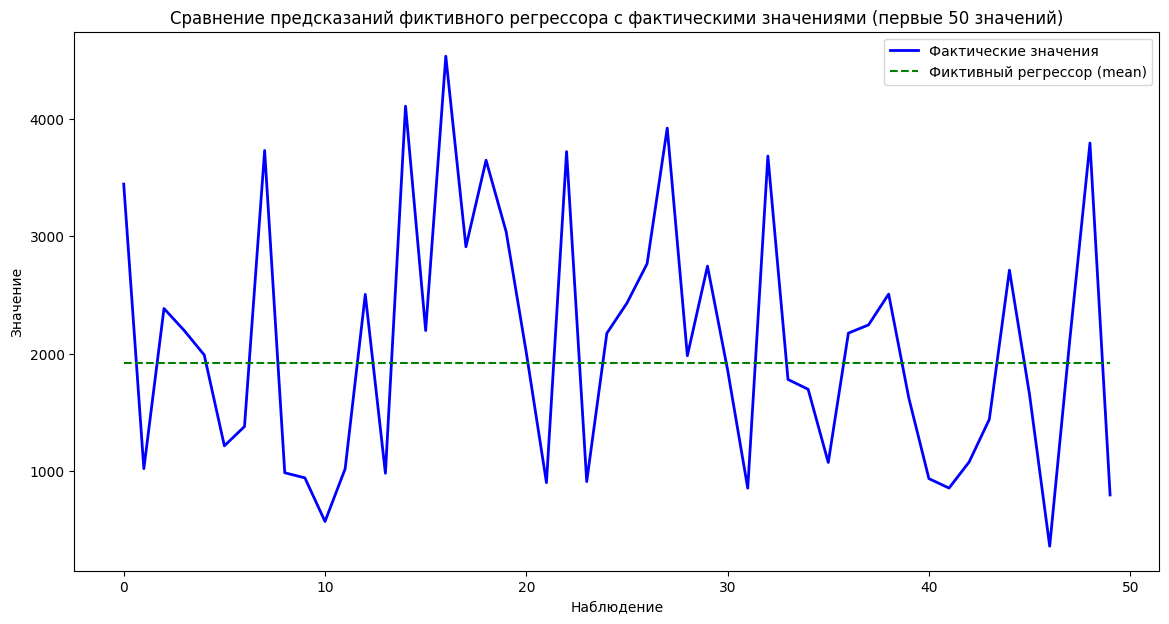

In [14]:
# 8. DummyRegressor.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем фиктивный регрессор со стратегией 'mean'
dummy_regressor = DummyRegressor(strategy='mean')

# Обучаем фиктивный регрессор
dummy_regressor.fit(X_train, y_train)

# Делаем прогнозы на тестовом наборе
y_pred_dummy = dummy_regressor.predict(X_test)

# Вычисление метрик для фиктивного регрессора
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
mse_dummy = mean_squared_error(y_test, y_pred_dummy)
r2_dummy = r2_score(y_test, y_pred_dummy)

print(f"Фиктивный регрессор - Средняя абсолютная ошибка (MAE): {mae_dummy:.2f}")
print(f"Фиктивный регрессор - Среднеквадратичная ошибка (MSE): {mse_dummy:.2f}")
print(f"Фиктивный регрессор - Коэффициент детерминации (R²): {r2_dummy:.2f}")


# Визуализируем предсказания фиктивного регрессора и случайного леса с фактическими значениями (первые 50 значений)
plt.figure(figsize=(14, 7))
plt.plot(range(50), y_test.iloc[:50], label='Фактические значения', color='blue', linewidth=2)
plt.plot(range(50), y_pred_dummy[:50], label='Фиктивный регрессор (mean)', color='green', linestyle='--')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Сравнение предсказаний фиктивного регрессора с фактическими значениями (первые 50 значений)')
plt.legend()
plt.show()


In [15]:
# Сравнение результатов.
# Список моделей для сравнения
models = {
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "CatBoostRegressor": CatBoostRegressor(iterations=100, learning_rate=0.05, depth=6, random_state=42, verbose=0),
    "Lasso": Lasso(alpha=0.1),
    "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "DummyRegressor": DummyRegressor(strategy='mean')
}

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"Обучаем {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")

    return {
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }

# Оценка всех моделей
results = []
for name, model in models.items():
    try:
        res = evaluate_model(name, model, X_train, y_train, X_test, y_test)
        results.append(res)
    except Exception as e:
        print(f"Ошибка при обучении {name}: {e}")

# Создаем DataFrame с результатами и сортируем по R² (максимизация)
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='R²', ascending=False).reset_index(drop=True)

print("\nСравнение моделей по метрикам:")
print(df_results)

Обучаем GradientBoostingRegressor...
MAE: 177.0388
MSE: 47600.0766
RMSE: 218.1744
R²: 0.9491
Обучаем ExtraTreesRegressor...
MAE: 179.8818
MSE: 49058.1881
RMSE: 221.4908
R²: 0.9475
Обучаем CatBoostRegressor...
MAE: 169.3193
MSE: 44458.2812
RMSE: 210.8513
R²: 0.9524
Обучаем Lasso...
MAE: 244.2052
MSE: 97567.8340
RMSE: 312.3585
R²: 0.8956
Обучаем KNeighborsRegressor...
MAE: 505.7842
MSE: 414689.0857
RMSE: 643.9636
R²: 0.5562
Обучаем ElasticNet...
MAE: 243.8227
MSE: 97362.8663
RMSE: 312.0302
R²: 0.8958
Обучаем RandomForestRegressor...
MAE: 175.3933
MSE: 47501.5540
RMSE: 217.9485
R²: 0.9492
Обучаем DummyRegressor...
MAE: 790.7341
MSE: 934615.3599
RMSE: 966.7551
R²: -0.0003

Сравнение моделей по метрикам:
                       Model         MAE            MSE        RMSE        R²
0          CatBoostRegressor  169.319303   44458.281230  210.851325  0.952419
1      RandomForestRegressor  175.393336   47501.554020  217.948512  0.949162
2  GradientBoostingRegressor  177.038768   47600.076579  